In [1]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zipped folder
uploaded = files.upload()

Saving Faces.zip to Faces.zip


In [2]:
with zipfile.ZipFile("Faces.zip", 'r') as zip_ref:
    zip_ref.extractall("Faces")

# Step 3: Check the files
os.listdir("Faces")
image_dir = "Faces/Faces"

data_dir=image_dir

In [7]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
def load_images_and_labels(data_dir):
    images = []
    labels = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            label = filename.split('_')[1].split('.')[0]# Extract the label from the filename
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                labels.append(label)

    print(f'Loaded {len(images)} images from {data_dir}')
    return images, labels

images, labels = load_images_and_labels(data_dir)


Loaded 410 images from Faces/Faces


In [5]:
print(len(labels),len(images))
def preprocess_data(images, labels, image_size=(100, 100)):
    resized_images = [cv2.resize(image, image_size) for image in images]
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return np.array(resized_images), encoded_labels, label_encoder

resized_images, encoded_labels, label_encoder = preprocess_data(images, labels)
print(f'Shape of resized_images: {resized_images.shape}')
print(f'Shape of encoded_labels: {encoded_labels.shape}')
X_train, X_test, y_train, y_test = train_test_split(resized_images, encoded_labels, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

410 410
Shape of resized_images: (410, 100, 100)
Shape of encoded_labels: (410,)
Shape of X_train: (328, 100, 100)
Shape of X_test: (82, 100, 100)
Shape of y_train: (328,)
Shape of y_test: (82,)


In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)  # Add channel dimension
num_classes = len(np.unique(encoded_labels))

In [8]:
num_classes = len(np.unique(encoded_labels))
print(f'Number of classes: {num_classes}')
print(f'Shape of X_test: {X_test.shape}')

# ==== CNN Model ====
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()


Number of classes: 41
Shape of X_test: (82, 100, 100, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,736,489 (6.62 MB)

 Trainable params: 1,736,489 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32,epochs=200,validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
final_train_acc = history.history['accuracy'][-1]
print("Final Training Accuracy:", final_train_acc)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 1.0000 - loss: 1.8506e-05 - val_accuracy: 0.8902 - val_loss: 0.5712
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9893 - loss: 0.0167 - val_accuracy: 0.9634 - val_loss: 0.1406
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9916 - loss: 0.0183 - val_accuracy: 0.9634 - val_loss: 0.1801
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9390 - val_loss: 0.1868
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9945 - loss: 0.0062 - val_accuracy: 0.9146 - val_loss: 0.3770
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9919 - loss: 0.0059 - val_accuracy: 0.9146 - val_loss: 0.2232
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 5.3366e-04 - val_accuracy: 0.9146 - val_loss: 0.2193
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 2.1975e-04 - val

11/11 - 1s - 99ms/step - accuracy: 1.0000 - loss: 3.8288e-06


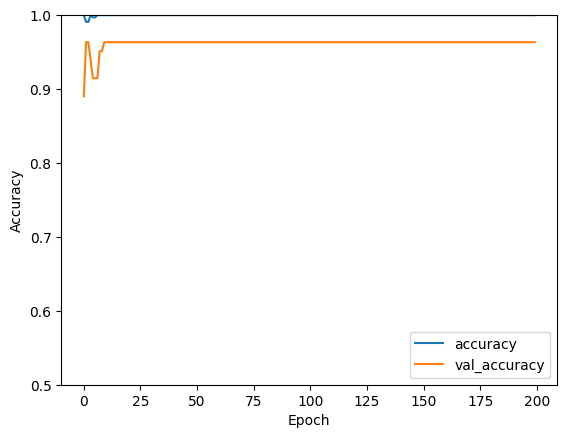

In [14]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

In [35]:
model.save("faces_cnn_model.h5")
print("Model saved as faces_cnn_model.h5")


Model saved as faces_cnn_model.h5


In [36]:
from google.colab import files
files.download("faces_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Upload CSV file with Roll Number and Name columns...


Saving students_random.csv to students_random (1).csv
Upload test image...


Saving two.jpg to two (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


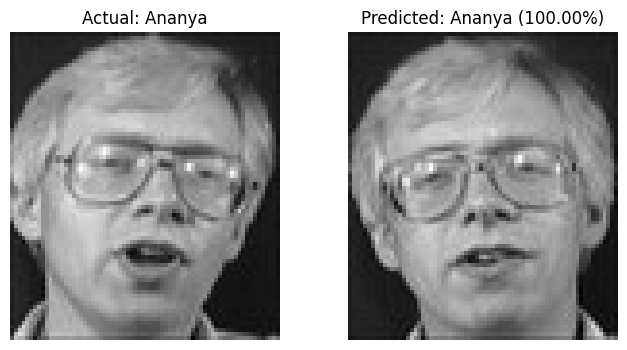

✅ Match Found — Roll Number: 2, Name: Ananya
Confidence: 100.00%


In [34]:
from tensorflow.keras.models import load_model
from google.colab import files
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ==== 1. Load trained model ====
model = load_model("faces_cnn_model.h5")

# ==== 2. Upload CSV with roll numbers and names ====
print("Upload CSV file with Roll Number and Name columns...")
uploaded_csv = files.upload()
csv_filename = list(uploaded_csv.keys())[0]
students_df = pd.read_csv(csv_filename)

# ==== 3. Upload test image ====
print("Upload test image...")
uploaded_img = files.upload()
test_image_path = list(uploaded_img.keys())[0]

# ==== 4. Preprocess test image ====
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image_resized = cv2.resize(test_image, (100, 100))
test_image_norm = test_image_resized.astype('float32') / 255.0
test_input = np.expand_dims(test_image_norm, axis=-1)  # channel dim
test_input = np.expand_dims(test_input, axis=0)        # batch dim

# ==== 5. Predict ====
predictions = model.predict(test_input)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index] * 100
predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

# ==== 6. Get matching student info from CSV ====
student_row = students_df[students_df['Roll Number'] == int(predicted_label)]
if not student_row.empty:
    roll_number = student_row.iloc[0]['Roll Number']
    name = student_row.iloc[0]['Name']
else:
    roll_number = None
    name = None

# ==== 7. Find actual/reference image from dataset ====
dataset_dir = "Faces"  # Folder where training images are stored
reference_image_path = None

for root, _, files in os.walk(dataset_dir):
    for f in files:
        if f.lower().endswith((".jpg", ".png", ".jpeg")):
            # Match file label to predicted label
            file_label = f.split('_')[1].split('.')[0]
            if file_label == str(predicted_label):
                reference_image_path = os.path.join(root, f)
                break
    if reference_image_path:
        break

if reference_image_path:
    reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
else:
    reference_image = None

# ==== 8. Display both images ====
plt.figure(figsize=(8, 4))

# Left: Reference image from dataset
if reference_image is not None:
    plt.subplot(1, 2, 1)
    plt.imshow(reference_image, cmap='gray')
    plt.title(f"Actual: {name if name else predicted_label}")
    plt.axis('off')

# Right: Uploaded test image
plt.subplot(1, 2, 2)
plt.imshow(test_image, cmap='gray')
if confidence >= 85.0:
    plt.title(f"Predicted: {name if name else predicted_label} ({confidence:.2f}%)")
else:
    plt.title(f"Unknown ({confidence:.2f}%)")
plt.axis('off')

plt.show()

# ==== 9. Print result in text ====
if confidence >= 85.0 and name:
    print(f"✅ Match Found — Roll Number: {roll_number}, Name: {name}")
    print(f"Confidence: {confidence:.2f}%")
else:
    print(f"❌ Unknown Face — Closest Match: {predicted_label} ({confidence:.2f}%)")
